<a href="https://colab.research.google.com/github/Rellendula26/PersonalPortfolio-RitvikEllendula-/blob/ML-Projects/California_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tsf

In [ ]:
#Acquire Dataset
from sklearn.datasets import fetch_california_housing  # Import from the correct module
cali=fetch_california_housing()

In [ ]:
#Split Data
X,y=cali.data, cali.target
# X is all of the data, and y is the target/labels for the data ( the correct answer for pricing )


In [ ]:
#PreProcessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() # standardscaler subtracts the mean of each feature
#this means the values become MUCHHHH lower, and the data is near 0ish
#The goals of Standardization are to have the mean 0 and the variance 1 by dividing each miniature feature by the standard deviation
#This is important for ML algorithms because features perform better on a similar scale
#standardization is important so that the features are on a level playing field
#X bedroomvs vs footage are VERYYYYYYY DIFFERENT : single digits to hundreds of thousands, leading to important leveling the playing field for features
X_scaled=scaler.fit_transform(X)

#Training & Testing Split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=26)


In [ ]:
#Building Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model= Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    #creates a dense layer with 100 neurons
    #uses relu activation
    #garners input shape that the layer expects to get
    #input should be a one-dimensional vector
    Dense(64, activation='relu'),
    Dense(1) #produces one final value (predicted house price)

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model compilation
model.compile(optimizer='adam',
              loss='mean_squared_error', # Use mean squared error for regression
              metrics=['mean_absolute_error'])

In [ ]:
#fitting model
model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2)
#neural networks use their learning process through gradient descent
#this means calcing loss on training samples and then changing weights
#so, instead of calculating error on each training set (1 iteration), it would take the average from multiple
#a batch of 32 means that every 32 iterations it learns, so there would be a stark difference in 63 epochs and 64 or 65

Epoch 1/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7161 - mean_absolute_error: 0.9047 - val_loss: 0.4635 - val_mean_absolute_error: 0.4843
Epoch 2/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4909 - mean_absolute_error: 0.4668 - val_loss: 0.4074 - val_mean_absolute_error: 0.4450
Epoch 3/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3962 - mean_absolute_error: 0.4405 - val_loss: 0.3868 - val_mean_absolute_error: 0.4263
Epoch 4/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3830 - mean_absolute_error: 0.4329 - val_loss: 0.3989 - val_mean_absolute_error: 0.4253
Epoch 5/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3425 - mean_absolute_error: 0.4133 - val_loss: 0.3517 - val_mean_absolute_error: 0.4201
Epoch 6/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5047 - mean_absolute_error: 0.4146 - val_loss: 0.3535 - val_mean_absolute_error: 0.3999
Epoch 7/75
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3370 - mean_absolute_error: 0.4000 - v

In [ ]:
#Model performance
test_loss, test_metrics=model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_metrics}")
#lower loss and MAE refer to lower variability and spread outness


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2688 - mean_absolute_error: 0.3509
Test Loss: 0.2762752175331116, Test MAE: 0.3550029695034027


In [ ]:
#PREDICTIONS
predictions = model.predict(X_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


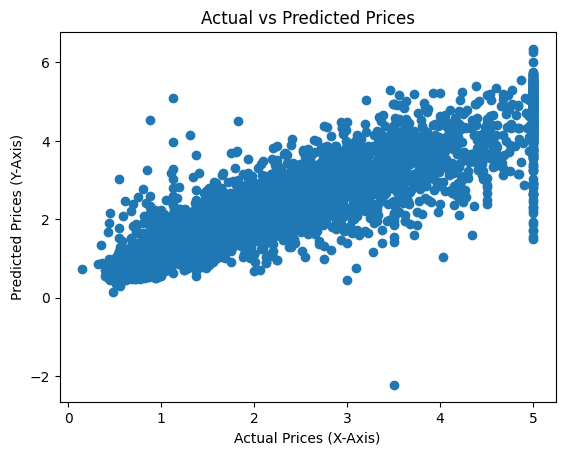

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices (X-Axis)')
plt.ylabel('Predicted Prices (Y-Axis)')
plt.title('Actual vs Predicted Prices')
plt.show()
